# Creation de la base finale pour JS 

Votes et abstention

In [1]:
import pandas as pd
import geopandas as gpd
import os 
import matplotlib.pyplot as plt

In [2]:
dir=os.getcwd()

Densite de population

In [210]:
dens=pd.read_csv(dir+'\\brut\\metropole-densites-de-population-par-commune.csv',sep=';')
dens=dens.rename(columns={'Code INSEE':'insee',"Densité d'habitants (hab/km2)" : 'densitehabkm2'})
dens=dens[['insee','densitehabkm2']]

In [211]:
dens.insee=dens.insee.astype(int)
dens.dtypes

insee              int32
densitehabkm2    float64
dtype: object

Niveau de vie et taux de pauvreté

In [212]:
com=pd.read_csv(dir+'\\brut\\base-comparateur-de-territoires.csv',sep=';')
com=com.rename(columns={'CODGEO':'insee','MED16':'medianendv','TP6016':'tp'})
com=com[['insee','tp','medianendv']]

In [213]:
com.insee=com.insee.astype(int)
com.dtypes

insee           int32
tp            float64
medianendv    float64
dtype: object

In [214]:
com.head() # tp on a pas pour tout 

,insee,tp,medianendv
0,77006,NaN,26092.333333
1,77014,14.0,22116.500000
2,77018,8.0,24604.000000
3,77024,NaN,22022.222222
4,77038,NaN,29417.500000


Pollution

In [215]:
pol=pd.read_csv(dir+'\\brut\\indices_QA_commune_IDF_2017.csv',sep=',')

pol=pol.groupby('ninsee',as_index=False).mean()

pol=pol.rename(columns={'ninsee':'insee'})

In [216]:
pol.insee=pol.insee.astype(int)

In [217]:
pol.dtypes

insee      int32
no2      float64
o3       float64
pm10     float64
dtype: object

Diplomes 

In [218]:
dipl = pd.read_csv(dir+'\\brut\\base-cc-diplomes-formation-2016.csv',sep=';')

C:\Users\morga\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [219]:
dipl=dipl[['CODGEO','P16_NSCOL15P','P16_NSCOL15P_SUP']]

dipl=dipl.rename(columns={'P16_NSCOL15P':'nb_nscol','P16_NSCOL15P_SUP':'dipl_sup','CODGEO':'insee'})

dipl=dipl.assign(dipl_su_tx=dipl.dipl_sup/dipl.nb_nscol)

dipl=dipl[['insee','dipl_su_tx']]


In [220]:
dipl.dtypes

insee          object
dipl_su_tx    float64
dtype: object

In [221]:
import numpy as np

In [222]:
dipl=dipl[pd.to_numeric(dipl['insee'], errors='coerce').notnull()]

In [223]:
dipl.insee=dipl.insee.astype(int)

Prix au mètre carré 

In [224]:
prix=pd.read_csv(dir+'\\brut\\prixm2-communes-2017.csv',sep=',')

prix=prix[['INSEE_COM','Prixm2']]

prix=prix.rename(columns={'INSEE_COM':'insee','Prixm2':'prixm2'})

In [225]:
prix.dtypes

insee      object
prixm2    float64
dtype: object

In [226]:
prix=prix[pd.to_numeric(prix['insee'], errors='coerce').notnull()]
prix.insee=prix.insee.astype(int)

In [227]:
prix.dtypes

insee       int32
prixm2    float64
dtype: object

Impôt sur la fortune

In [228]:
isf=pd.read_excel(dir+'\\brut\\ificom2018.xlsx',headers=True,sheet_name='définitif impot')

isf=isf[['Code commune (INSEE)','nombre de redevables','patrimoine moyen en €','impôt moyen en €']]

isf.columns=['insee','nb_redevables','patrimoineeuro','impotmoyeneuro']

In [229]:
isf.dtypes

insee              object
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

In [230]:
isf['insee']= isf['insee'].transform(lambda x : x.replace(' ','')) 

In [231]:
isf=isf[pd.to_numeric(isf['insee'], errors='coerce').notnull()]
isf.insee=isf.insee.astype(int)

In [232]:
isf.dtypes

insee               int32
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

In [233]:
#Base Sarah 
eco=pd.read_csv(dir+'\\brut\\data_chom_prop.csv')
eco.head()

,Unnamed: 0,insee,TauxProprietaires,TauxChomage,NiveauVieMedian
0,29274,75056,33.097629,12.070128,26808.0
1,29983,77001,89.804772,7.377049,28596.0
2,29984,77002,82.445141,8.505155,22877.0
3,29985,77003,83.448276,5.238095,25606.0
4,29986,77004,90.082645,4.794521,26871.0


In [234]:
eco=eco.drop(columns=['Unnamed: 0'])
eco=eco.rename(columns={'CODGEO':'insee'})

In [235]:
eco.dtypes

insee                  int64
TauxProprietaires    float64
TauxChomage          float64
NiveauVieMedian      float64
dtype: object

Votes

In [236]:
vote =pd.read_csv(dir+'\\brut\\data_final_vote.csv')
vote=vote[['CODGEO','Tour1Candidat1']]

In [237]:
vote=vote.rename(columns={'CODGEO':'insee'})

Merge 

In [238]:
bases=[eco,dens,dipl,pol,vote,com,isf,prix]

In [239]:
import geopandas as gpd 
pop=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_comgeo.geojson')
variables= pd.DataFrame(pop.insee)
variables.insee=variables.insee.astype(int)

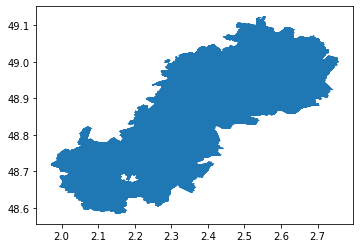

In [240]:
pop.plot()

In [241]:
for data in bases:
    variables=variables.merge(data,how='left',on='insee')

In [242]:
variables.head()

,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2
0,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON François,NaN,36311.470588,NaN,NaN,NaN,2113.0
1,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON François,NaN,36311.470588,NaN,NaN,NaN,2113.0
2,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON François,NaN,36311.470588,NaN,NaN,NaN,2113.0
3,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON François,NaN,36311.470588,NaN,NaN,NaN,2113.0
4,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON François,NaN,36311.470588,NaN,NaN,NaN,2113.0


In [243]:
# SOucis avec les élections j'ai pas les correspondances !! 

In [244]:
variables.to_csv('variables.csv')

Professionnels de Santé

In [181]:
med=pd.read_csv(dir+'\\brut\\annuaire-et-localisation-des-professionnels-de-sante.csv',sep=';')

med=med[["Nature de l'exercice","Convention du professionnel","Coordonnées",'Adresse','Code INSEE']]

med.columns=['nature_exercice','convention','coordonnees','adresse','insee']

In [182]:
# Ici interessant de mettre des marqueurs ? Je laisse comme ça => sinon compter 
med.groupby('insee').count()

,nature_exercice,convention,coordonnees,adresse
insee,,,,
75056,8263,8263,8263,8263
77005,3,3,3,3
77014,22,22,22,22
77016,1,1,1,1
77018,15,15,15,15
...,...,...,...,...
95637,19,19,19,19
95651,5,5,5,5
95652,6,6,6,6


In [183]:
med.dtypes

nature_exercice    object
convention         object
coordonnees        object
adresse            object
insee               int64
dtype: object

In [184]:
med.insee=med.insee.astype(int)

# Traffic (lié aux stations et non aux communes)

In [80]:
traffic=pd.read_csv(r'C:/Users/morga/Downloads/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-2e-sem.csv',sep=';')

traffic=traffic[traffic['CODE_STIF_TRNS']==810]

CHAT = traffic[traffic['LIBELLE_ARRET'].str.startswith('CHAT')]

traffic=traffic[traffic['CODE_STIF_RES']==802]

traffic=traffic.append(CHAT)

traffic=traffic.groupby(['JOUR','LIBELLE_ARRET'],as_index=False)['NB_VALD'].sum()

traffic=traffic[['LIBELLE_ARRET','NB_VALD']]

traffic=traffic.groupby(['LIBELLE_ARRET'],as_index=False).mean()

In [88]:
perc_traffic=pd.read_csv(dir+'\\brut\\validations-sur-le-reseau-ferre-profils-horaires-par-jour-type-2e-sem.csv')

perc_traffic=perc_traffic[perc_traffic['CODE_STIF_TRNS']==810]

perc_traffic=perc_traffic[['LIBELLE_ARRET','TRNC_HORR_60','pourc_validations']]

In [89]:
perc_traffic.head()

,LIBELLE_ARRET,TRNC_HORR_60,pourc_validations
0,LA HACQUINIERE,16H-17H,2.60
1,LA HACQUINIERE,1H-2H,0.01
2,LA HACQUINIERE,20H-21H,1.34
3,LA HACQUINIERE,23H-0H,0.17
4,LA HACQUINIERE,5H-6H,1.48


In [90]:
traffic.head()

,LIBELLE_ARRET,NB_VALD
0,AEROPORT CHARLES DE GAULLE 1,4751.359551
1,AEROPORT CHARLES DE GAULLE 2-TGV,6158.989071
2,ANTONY,11292.179348
3,ARCUEIL-CACHAN,8561.918478
4,AULNAY-SOUS-BOIS,15838.554348


In [92]:
traffic_par_heure=perc_traffic.merge(traffic,how='left')

In [95]:
traffic_par_heure=traffic_par_heure.assign(NB_VALD_HOUR=traffic_par_heure.pourc_validations*traffic_par_heure.NB_VALD)

In [97]:
traffic_par_heure.to_csv('traffic_par_heure.csv')

Cartes pour visualiser le résultat 

In [259]:
import geopandas as gpd 
pop=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_comgeo.geojson')
pop.insee=pop.insee.astype(int)
data_map=variables.merge(pop,on='insee')

In [260]:
data_map.columns

Index(['insee', 'TauxProprietaires', 'TauxChomage', 'NiveauVieMedian',
       'densitehabkm2', 'dipl_su_tx', 'no2', 'o3', 'pm10', 'Tour1Candidat1',
       'tp', 'medianendv', 'nb_redevables', 'patrimoineeuro', 'impotmoyeneuro',
       'prixm2', 'year', 'population', 'pct_ch', 'year_rer', 'year_pop',
       'steps', 'geometry'],
      dtype='object')

In [277]:
import mapclassify
import geoplot
import matplotlib.pyplot as plt 
data_map=data_map.set_geometry('geometry')

Text(0.5, 1.0, 'Taux de chômage')

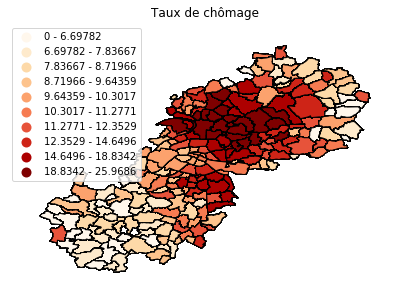

In [284]:
scheme = mapclassify.Quantiles(data_map.TauxChomage, k=10)
geoplot.choropleth(
    data_map, hue=data_map.TauxChomage, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux de chômage')

Text(0.5, 1.0, 'Taux de propriétaires')

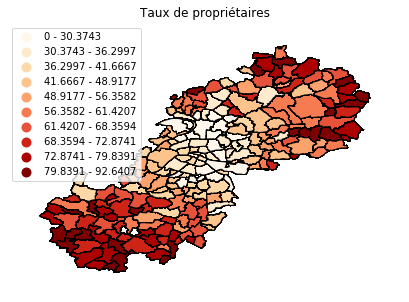

In [283]:
scheme = mapclassify.Quantiles(data_map.TauxProprietaires, k=10)
geoplot.choropleth(
    data_map, hue=data_map.TauxProprietaires, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux de propriétaires')

Text(0.5, 1.0, 'Taux pollution pm10')

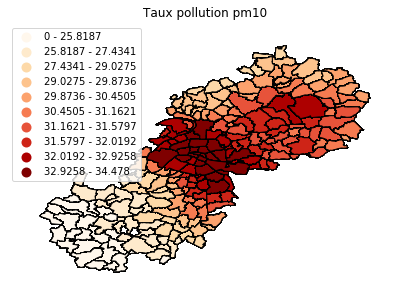

In [281]:
scheme = mapclassify.Quantiles(data_map.pm10, k=10)
geoplot.choropleth(
    data_map, hue=data_map.pm10, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux pollution pm10')

Text(0.5, 1.0, 'dipl_su_tx')

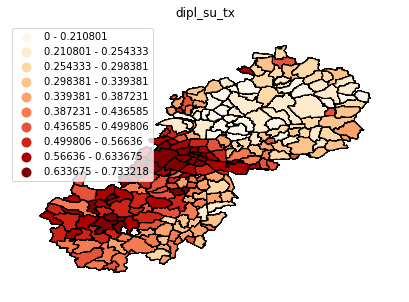

In [282]:
scheme = mapclassify.Quantiles(data_map.dipl_su_tx, k=10)
geoplot.choropleth(
    data_map, hue=data_map.dipl_su_tx, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('dipl_su_tx')